In [1]:
%cd C:\Users\yukir\Documents\GitHub\Sign_Recognition\py

from basic_preprocessing import *
from deeplearning_check import *
from video_info import *
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import os

gpu_check()
set_global_determinism(seed=SEED)

%cd C:\Users\yukir\Documents\Monicas_workspace\smart cctv

C:\Users\yukir\Documents\GitHub\Sign_Recognition\py


Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8389999518249087398
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 8634258339277812197
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9876635648
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13439143020924465002
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10528054870480810395
physical_device_desc: "device: XLA_GPU device"
]
tf 2.3.0
keras 2.4.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
C:\Users\yukir\Documents\Monicas_workspace\smart cctv


In [2]:
np.__version__

'1.18.5'

In [3]:
DATA_PATH = os.path.join("C:\\Users\\yukir\\Documents\\Monicas_workspace\\smart cctv\\dataset\\")
actions = np.array(['fall', 'left'])

In [4]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'fall': 0, 'left': 1}

In [5]:
from tqdm import tqdm

In [6]:
sequences, labels = [], []
for action in actions:
    for sequence in range(100):
        window = []
        for frame_num in range(400):
            try:
                res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            except:
                pass
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [7]:
X = np.array(sequences)

In [8]:
X.shape

(200, 400, 1662)

In [9]:
y = to_categorical(labels).astype(int)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [11]:

y_test.shape

(40, 2)

### MODEL

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [13]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [14]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Input, TimeDistributed
from tensorflow.keras.models import Model

In [15]:
import numpy as np

In [16]:
np.__version__

'1.18.5'

In [17]:
model = Sequential()
model.add(LSTM(100, input_shape=(400,1662)))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [18]:
res = [.8, 0.3]

In [19]:
actions[np.argmax(res)]

'fall'

In [23]:
checkpoint_path = "check_point/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

es = EarlyStopping(patience=20)
mc = ModelCheckpoint(filepath=checkpoint_path,
            monitor='loss', 
            mode='min',
            save_best_only=True,
            save_weights_only=True,
            verbose=1)
rlr = ReduceLROnPlateau(factor=0.1, patience=5)
csvlogger = CSVLogger("file_name.log")

In [29]:
history = model.fit(X_train, y_train, batch_size= 16, validation_data=(X_test,y_test), epochs=100, callbacks=[es, mc, rlr, csvlogger])

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.6212 - categorical_accuracy: 0.6250 
Epoch 00001: loss improved from inf to 0.62123, saving model to check_point\cp.ckpt
10/10 [==============================] - 305s 31s/step - loss: 0.6212 - categorical_accuracy: 0.6250 - val_loss: 0.5632 - val_categorical_accuracy: 0.7000
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.5736 - categorical_accuracy: 0.7000 
Epoch 00002: loss improved from 0.62123 to 0.57355, saving model to check_point\cp.ckpt
10/10 [==============================] - 316s 32s/step - loss: 0.5736 - categorical_accuracy: 0.7000 - val_loss: 0.5725 - val_categorical_accuracy: 0.6750
Epoch 3/100
 2/10 [=====>........................] - ETA: 1:07 - loss: 0.6199 - categorical_accuracy: 0.7812

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               705200    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 715,502
Trainable params: 715,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_dict = history.history
print(history_dict.keys())

NameError: name 'history' is not defined

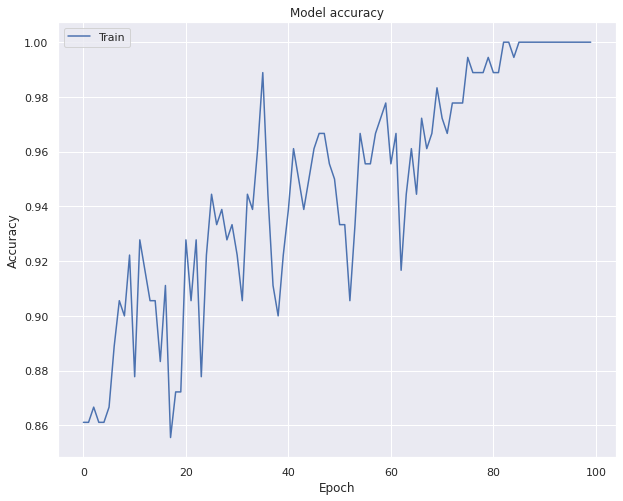

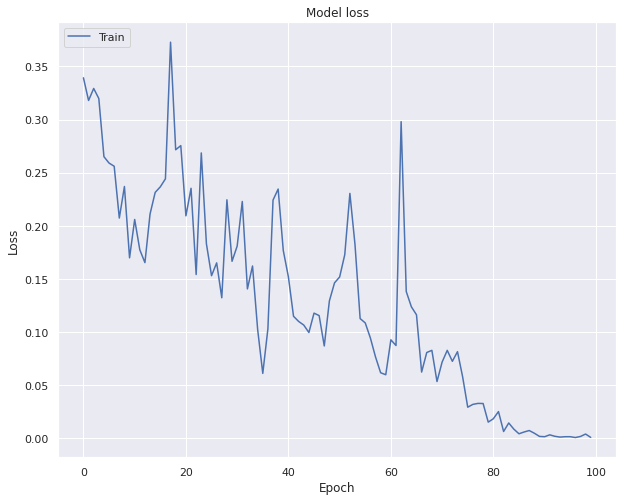

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)
    
    

fig = plt.figure()
fig.set_size_inches(15, 5)

fig.add_subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label ='Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plt.figure()
fig.add_subplot(1, 2, 2) 
plt.plot(epochs, loss, 'b', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and validation lose')
plt.legend()

plt.show()

### Predictions

In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[0])]

'fall'

In [ ]:
actions[np.argmax(y_test[0])]

'fall'

### Save Weights

In [ ]:
model.save('best_fall_left.h5')

### Acc

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[9, 1],
        [1, 9]],

       [[9, 1],
        [1, 9]]], dtype=int64)

In [ ]:
accuracy_score(ytrue, yhat)

0.9